### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [78]:
data = None

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [79]:
data = pd.read_csv('data/coupons.csv')

In [80]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [82]:
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


2. Investigate the dataset for missing or problematic data.

In [83]:
data.isna()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12680,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12681,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12682,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [84]:
data.isnull()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12680,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12681,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12682,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


3. Decide what to do about your missing data -- drop, replace, other...

In [85]:
# Replace '50plus' with 51 in the 'age' column of the DataFrame
data['age'] = data['age'].replace(to_replace='50plus', value=51)


In [86]:
# Replace 'below21' with 20 in the 'age' column of the DataFrame
data['age'] = data['age'].replace(to_replace='below21', value=20)


In [87]:
#convert all values in age column to str
data['age'] = data['age'].astype(int)

(array([3200., 2559.,    0., 2039.,    0., 1319., 1093.,    0.,  686.,
        1788.]),
 array([20. , 23.1, 26.2, 29.3, 32.4, 35.5, 38.6, 41.7, 44.8, 47.9, 51. ]),
 <BarContainer object of 10 artists>)

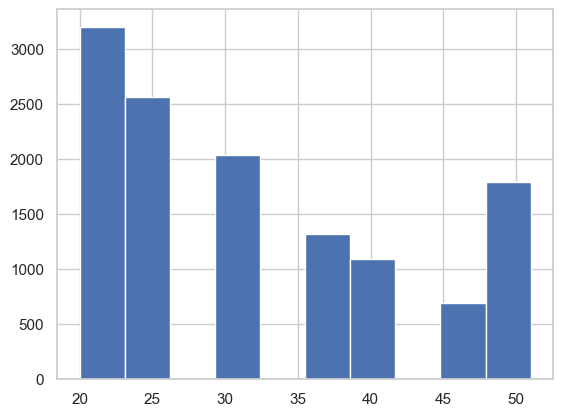

In [88]:
plt.hist(data['age'])

In [89]:
data = data.dropna()

4. What proportion of the total observations chose to accept the coupon? 



(array([46.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 62.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

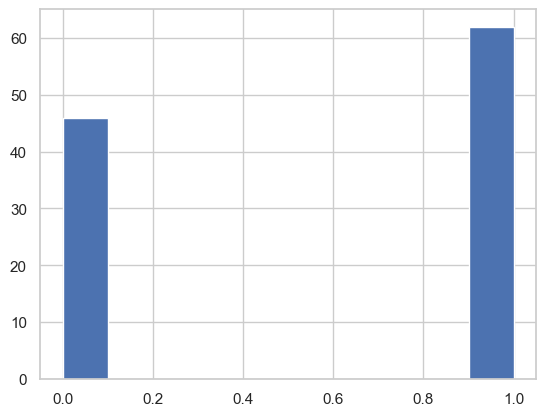

In [90]:
plt.hist(data['Y'])

In [91]:
count_of_ones = data[data['Y'] == 1].shape[0]
print(count_of_ones)
count_of_zeros = data[data['Y'] == 0].shape[0]
print(count_of_zeros)

62
46


5. Use a bar plot to visualize the `coupon` column.

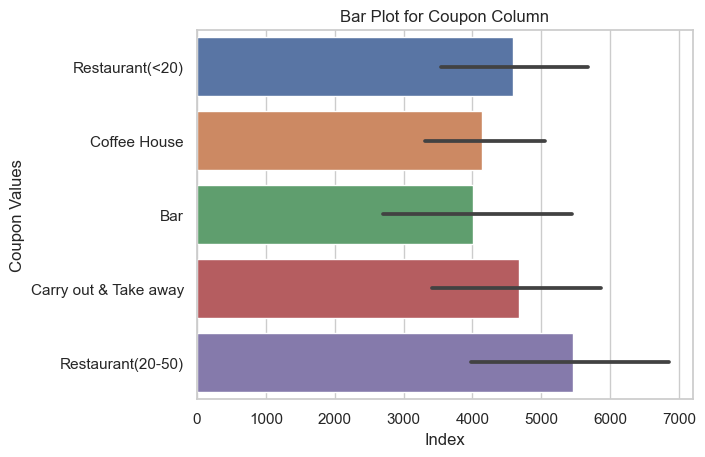

In [92]:
sns.barplot(x=data.index, y=data['coupon'])
plt.xlabel('Index')
plt.ylabel('Coupon Values')
plt.title('Bar Plot for Coupon Column')
plt.show()

6. Use a histogram to visualize the temperature column.

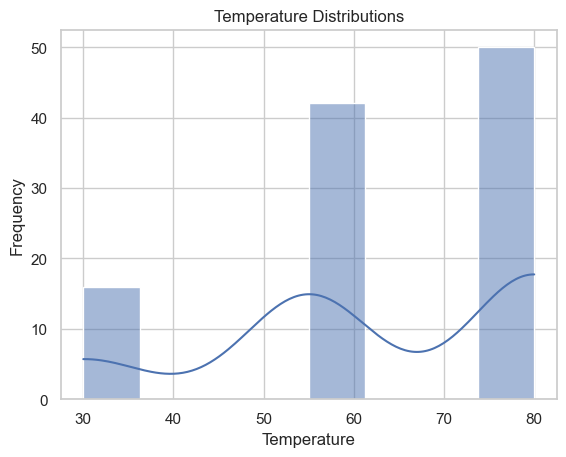

In [93]:
sns.histplot(data['temperature'], kde=True)  # Set kde=False if you don't want the Kernel Density Estimation (smooth curve)
plt.xlabel('Temperature')  # Customize X-axis label
plt.ylabel('Frequency')  # Customize Y-axis label
plt.title('Temperature Distributions')  # Set the plot title
plt.show()  # Display the plot

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [94]:
data_bar_coupons = data[data['coupon'] == 'Bar']
data_bar_coupons.info()
data_bar_coupons.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 1239 to 8292
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           13 non-null     object
 1   passanger             13 non-null     object
 2   weather               13 non-null     object
 3   temperature           13 non-null     int64 
 4   time                  13 non-null     object
 5   coupon                13 non-null     object
 6   expiration            13 non-null     object
 7   gender                13 non-null     object
 8   age                   13 non-null     int32 
 9   maritalStatus         13 non-null     object
 10  has_children          13 non-null     int64 
 11  education             13 non-null     object
 12  occupation            13 non-null     object
 13  income                13 non-null     object
 14  car                   13 non-null     object
 15  Bar                   13 non-null    

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1239,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Single,...,4~8,4~8,1~3,never,1,0,0,0,1,1
1250,Home,Alone,Sunny,55,6PM,Bar,1d,Male,26,Single,...,4~8,4~8,1~3,never,1,0,0,1,0,0
1254,Work,Alone,Sunny,55,7AM,Bar,1d,Male,26,Single,...,4~8,4~8,1~3,never,1,1,1,0,1,0
2613,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,41,Married partner,...,1~3,1~3,1~3,less1,1,1,0,0,1,0
2617,Home,Alone,Sunny,55,6PM,Bar,1d,Female,41,Married partner,...,1~3,1~3,1~3,less1,1,0,0,1,0,0


2. What proportion of bar coupons were accepted?


In [95]:
accepted = data_bar_coupons[data_bar_coupons['Y'] == 1].shape[0]
print(accepted)
proportion_bar_accepted = accepted/len(data_bar_coupons)
print(proportion_bar_accepted)

3
0.23076923076923078


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [96]:
bar_3orfewer_times = data_bar_coupons[(data_bar_coupons['Bar'].isin(['1~3', 'never', 'less1'])) & (data_bar_coupons['Y'] == 1)].shape[0]

bar_morethan3_times = data_bar_coupons[data_bar_coupons['Bar'].isin(['gt8', '4~8']) & (data_bar_coupons['Y'] == 1)].shape[0]

print(bar_3orfewer_times)
print(bar_morethan3_times)


1
2


In [97]:
bar_3orfewer_times_all = data[data['Bar'].isin(['1~3', 'never', 'less1']) & (data['Y'] == 1)].shape[0]
bar_morethan3_times_all = data[data['Bar'].isin(['gt8', '4~8']) & (data['Y'] == 1)].shape[0]

print(bar_3orfewer_times_all)
print(bar_morethan3_times_all)


52
10


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [98]:
bar_onceorless_times_all = data[data['Bar'].isin(['never', 'less1']) & (data['Y'] == 1) & (data['age'] > 25)].shape[0]
bar_morethanonce_times_all = data[data['Bar'].isin(['1~3','gt8', '4~8']) & (data['Y'] == 0)].shape[0]

print(bar_onceorless_times_all)
print(bar_morethanonce_times_all)

35
12


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [99]:
data = None
data = data = pd.read_csv('data/coupons.csv')


In [100]:
# All unique values in kid and occupations columns
unique_values_children = data['has_children'].unique().tolist()

unique_values_occupation = data['occupation'].str.strip
unique_values_occupation = data['occupation'].str.replace('&', '')
unique_values_occupation = data['occupation'].unique().tolist()
#unique_values_occupation_sample= data['occupation'].sample(10)
    
unique_values_passengers = data['passanger'].str.strip
unique_values_passengers = data['passanger'].unique().tolist()

print('children', unique_values_children)
print('occupation',  unique_values_occupation)
#print('Occupation sample', unique_values_occupation_sample)
print('passengers',  unique_values_passengers)

children [1, 0]
occupation ['Unemployed', 'Architecture & Engineering', 'Student', 'Education&Training&Library', 'Healthcare Support', 'Healthcare Practitioners & Technical', 'Sales & Related', 'Management', 'Arts Design Entertainment Sports & Media', 'Computer & Mathematical', 'Life Physical Social Science', 'Personal Care & Service', 'Community & Social Services', 'Office & Administrative Support', 'Construction & Extraction', 'Legal', 'Retired', 'Installation Maintenance & Repair', 'Transportation & Material Moving', 'Business & Financial', 'Protective Service', 'Food Preparation & Serving Related', 'Production Occupations', 'Building & Grounds Cleaning & Maintenance', 'Farming Fishing & Forestry']
passengers ['Alone', 'Friend(s)', 'Kid(s)', 'Partner']


In [101]:
#Solution
# Filter out rows where 'occupation' column contains 'Farming Fishing & Forestry'
Question_5_Yes = data[~data['occupation'].str.contains('Farming Fishing & Forestry')]

# Additional filtering based on multiple conditions
conditions_Yes = (data['Bar'].isin(['1~3','gt8', '4~8']) 
              & (data['Y'] == 1) 
              & (data['passanger'].isin(['Friend(s)', 'Partner']))
             )

Question_5_Yes = data[conditions_Yes].shape[0]

# Filter out rows where 'occupation' column contains 'Farming Fishing & Forestry'
Question_5_No = data[~data['occupation'].str.contains('Farming Fishing & Forestry')]

# Additional filtering based on multiple conditions
conditions_No = (data['Bar'].isin(['1~3','gt8', '4~8']) 
              & (data['Y'] == 0) 
              & (data['passanger'].isin(['Friend(s)', 'Partner']))
             )

Question_5_No = data[conditions_No].shape[0]



print(Question_5_Yes)
print(Question_5_No)



976
438


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [102]:
marital_unique_values = data['maritalStatus'].unique().tolist()

print(marital_unique_values)

['Unmarried partner', 'Single', 'Married partner', 'Divorced', 'Widowed']


In [103]:
# Additional filtering based on multiple conditions
conditions = (data['Bar'].isin(['1~3', 'gt8', '4~8']) 
              & (data['Y'] == 1) 
              & data['passanger'].isin(['Friend(s)', 'Partner'])
              & data['maritalStatus'].isin(['Unmarried partner', 'Single', 'Married partner', 'Divorced'])
             )

Question_6_part1 = data[conditions].shape[0]

print(Question_6_part1)



976


In [104]:
#go to bars more than once a month and are under the age of 30 OR
conditions = (data['Bar'].isin(['1~3', 'gt8', '4~8']) 
              & (data['Y'] == 1) 
              & data['age'] < 30)

Question_6_part2 = data[conditions].shape[0]

print(Question_6_part2)

12684


In [105]:
income_unique_values = data['income'].unique().tolist()

print(income_unique_values)

['$37500 - $49999', '$62500 - $74999', '$12500 - $24999', '$75000 - $87499', '$50000 - $62499', '$25000 - $37499', '$100000 or More', '$87500 - $99999', 'Less than $12500']


In [106]:
RestaurantLessThan20_unique_values = data['RestaurantLessThan20'].unique().tolist()

print(RestaurantLessThan20_unique_values)

['4~8', '1~3', 'less1', 'gt8', nan, 'never']


In [107]:
#go to cheap restaurants more than 4 times a month and income is less than 50K.
conditions = (data['RestaurantLessThan20'].isin(['gt8', '4~8']) 
              & (data['Y'] == 1) 
              & data['income'] == '$37500 - $49999' )

Question_6_part3 = data[conditions].shape[0]

print(Question_6_part3)


0


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [108]:
#I hypothesize that drivers who accepted the bar coupons were already intended to drink that night and have plenty of disposable income to do so. I am guessing that they have no kids and likely would've been out with friends and under the age of 30.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [109]:
coupon_unique_values = data['coupon'].unique().tolist()

print(coupon_unique_values)

['Restaurant(<20)', 'Coffee House', 'Carry out & Take away', 'Bar', 'Restaurant(20-50)']


C:\Users\pranit.ravuri\AppData\Local\Temp\ipykernel_22832\1119197534.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<Axes: >

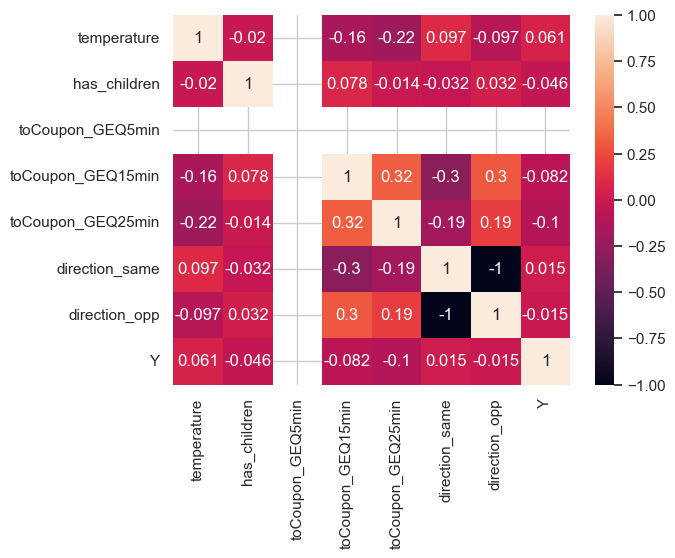

In [110]:
sns.heatmap(data.corr(), annot=True)

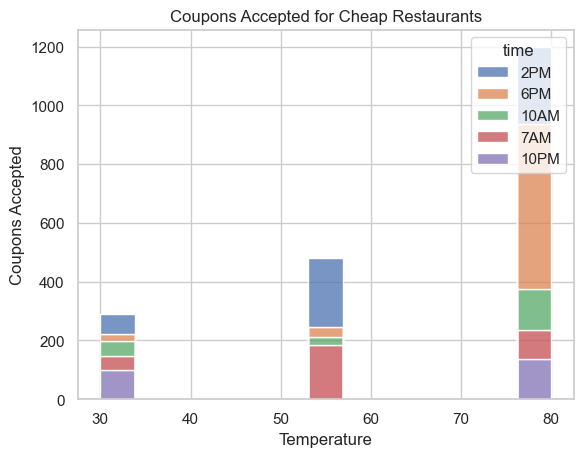

In [111]:
#Restaurant(<20)
# Filter the DataFrame
Restaurant_under20 = data[(data['coupon'] == 'Restaurant(<20)') & (data['Y'] == 1)]

# List of columns to compare
columns_to_compare = ['weather', 'time', 'temperature', 'destination', 'age', 'maritalStatus', 'has_children', 'income' ]

#create a stacked histogram
sns.set(style="whitegrid")
sns.histplot(data = Restaurant_under20, x='temperature', hue='time', multiple="stack", element="step", stat="count", common_norm=False, legend = 'upper center')


# Customize the plot
plt.xlabel('Temperature')
plt.ylabel('Coupons Accepted')
plt.title('Coupons Accepted for Cheap Restaurants')


# Show the plot
plt.show()


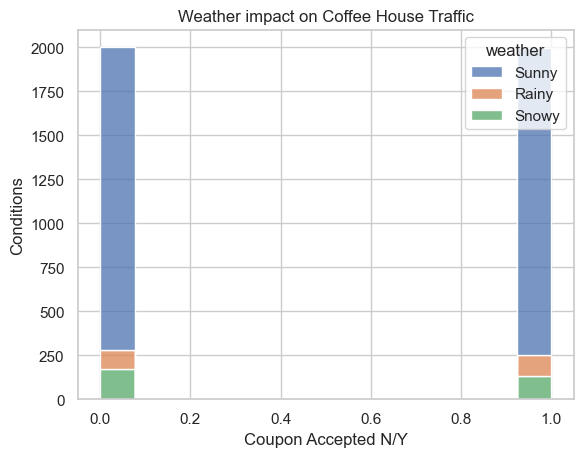

In [112]:
#Coffee House
Coffee_House = data[(data['coupon'] == 'Coffee House')]

#create a stacked histogram
sns.set(style="whitegrid")
sns.histplot(data = Coffee_House, x='Y', hue='weather', multiple="stack", element="step", stat="count", common_norm=False, legend = 'upper center')

# Customize the plot
plt.xlabel('Coupon Accepted N/Y')
plt.ylabel('Conditions')
plt.title('Weather impact on Coffee House Traffic')


# Show the plot
plt.show()


C:\Users\pranit.ravuri\AppData\Local\Temp\ipykernel_22832\3208924804.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Coffee_House['income_order'] = pd.Categorical(Coffee_House['income'], categories=income_order, ordered=True)


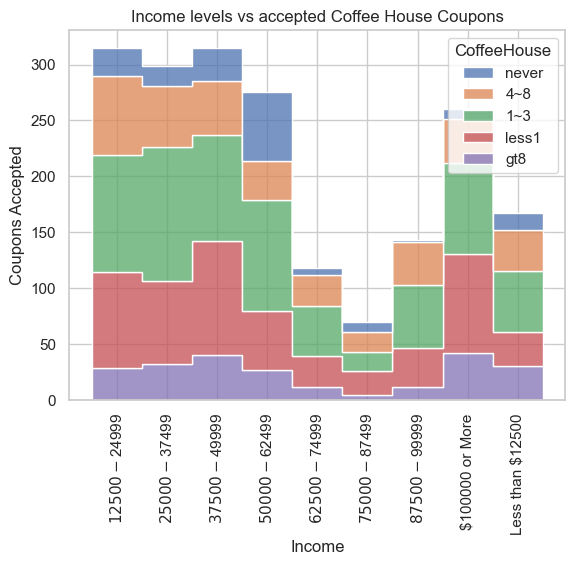

In [113]:
# Coffee House
Coffee_House = data[(data['coupon'] == 'Coffee House') & (data['Y'] == 1)]

# Define the custom order of income categories
income_order = ['$12500 - $24999', '$25000 - $37499', '$37500 - $49999', '$50000 - $62499', '$62500 - $74999', '$75000 - $87499', '$87500 - $99999', '$100000 or More', 'Less than $12500']

# Create a categorical column with custom ordering
Coffee_House['income_order'] = pd.Categorical(Coffee_House['income'], categories=income_order, ordered=True)

# Create a stacked histogram
sns.set(style="whitegrid")
sns.histplot(data=Coffee_House, x='income_order', hue='CoffeeHouse', multiple="stack", element="step", stat="count", common_norm=False, legend='upper center')

# Customize the plot
plt.xticks(rotation=90)
plt.xlabel('Income')
plt.ylabel('Coupons Accepted')
plt.title('Income levels vs accepted Coffee House Coupons')

# Show the plot
plt.show()


C:\Users\pranit.ravuri\AppData\Local\Temp\ipykernel_22832\974897350.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Carry_out_Take_away['age_order'] = pd.Categorical(Carry_out_Take_away['age'], categories=age_order, ordered=True)


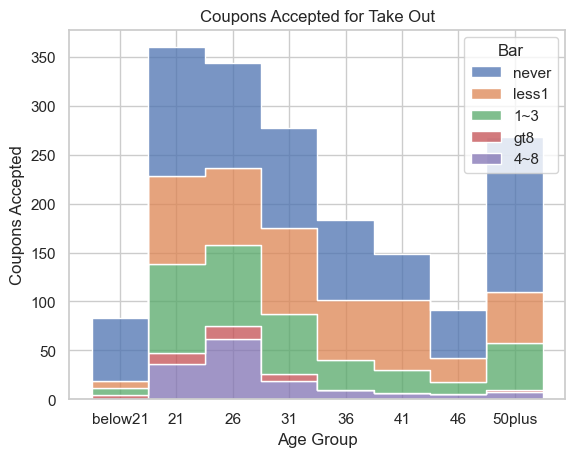

In [114]:
#Carry out & Take away
# Filter the DataFrame
Carry_out_Take_away = data[(data['coupon'] == 'Carry out & Take away') & (data['Y'] == 1)]

# Define the custom order of income categories
age_order = ['below21', '21', '26', '31', '36', '41', '46', '50plus']
# Create a categorical column with custom ordering
Carry_out_Take_away['age_order'] = pd.Categorical(Carry_out_Take_away['age'], categories=age_order, ordered=True)

# Create a stacked histogram
sns.set(style="whitegrid")
sns.histplot(data=Carry_out_Take_away, x='age_order', hue='Bar', multiple="stack", element="step", stat="count", common_norm=False, legend='upper center')

# Customize the plot
plt.xlabel('Age Group')
plt.ylabel('Coupons Accepted')
plt.title('Coupons Accepted for Take Out')


# Show the plot
plt.show()



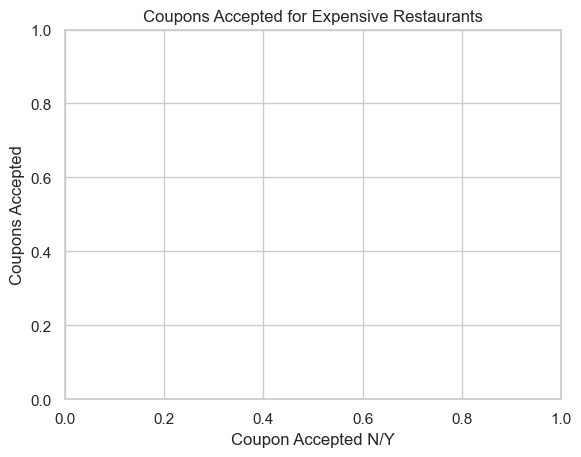

In [115]:
#Restaurant(20-50)
# Filter the DataFrame
Restaurant_under20 = data[(data['coupon'] == 'Restaurant20To50')]

# List of columns to compare
columns_to_compare = ['weather', 'time', 'temperature', 'destination', 'age', 'maritalStatus', 'has_children', 'income' ]

#create a stacked bar plot
sns.set(style="whitegrid")
sns.histplot(data = Restaurant_under20, x='Y', hue='Bar', multiple="stack", element="step", stat="count", common_norm=False, legend = 'upper center')

# Customize the plot
plt.xlabel('Coupon Accepted N/Y')
plt.ylabel('Coupons Accepted')
plt.title('Coupons Accepted for Expensive Restaurants')


# Show the plot
plt.show()
